# Segmenting and analysing Chicago Schools (Week 2)
### Applied Data Science Capstone Project (IBM/ Coursera)
#### By Aylin Mousavian

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Analysis](#Analysis)
* [Methodology](#Methodology)
* [Conclusion](#Conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Although growing national attention has focused on high rates of required participation in college admission, I reviewed Chicago schools to find best schools which features included college enrollments rates, CPS Performance Policy Level, SAFETY_SCORE, Environment Score, Leaders Score, Teachers Score, Parent Engagement Score,Parent Environment Score and Rate of Misconducts (per 100 students) in its rating systems. Admission and enrollments rates are generally collected state by state through statewide college reporting databases from each schools.
Although there is increased nationwide focus on college and career readiness,so the influence of college enrollment would be higher than other factors. State and national data systems cannot always provide the necessary data to evaluate schools on readiness. Many states are prioritizing efforts to link K–6 with postsecondary and state data systems in order to follow students from elementry school through highschool and college or employment. In addition to state data sources, college data may be accessed from testing agencies such as ACT and the College Board, and from the National Student Clearinghouse, which calculates college attendance rates. In this section we focused on data from city of Chicago, to revise which community is the top and with communities are better for great schools. At data acquisition we prepare and clean data at first part, at the second part I will analyse it, at third part I called it methodology, I make a function as a weighted function to score each school based on influential features and rate school as mentioned score. Then we prioritize schools according to their gained score, at the final we cluster each community based on their features and we will end it with result and conclution. 

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:

    Influential features which has effect on schools performance.
    function which made for calculating the score of school.
    how other feature influence on college preparation in this problem.

I decided to cluster schools to compare the results and see which communities are good to buy home based on schools ranking.

Following data sources will be needed to extract/generate the required information:

    coefficients of every feature which make effect on score value.
    apply function to measure  score and rank the school.

In [1]:
#Import libraries

!pip install geopy
!pip install folium
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot
import seaborn as sns
# Too see full dataframe...
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# First We have to locate the file path and changed accordingly

Libraries imported.


### Load data and prepare it for Analysing

##### Dataset belongs to chicago's school and has about 20 columns. I like to prepare it for analysing as best schools in chicago's communities

In [2]:
Schools=pd.read_csv('D:\DataScience\DataFrames\SCHOOLS1.csv')

In [3]:
Schools.columns=Schools.columns.str.replace(' ','_')##### replace blanks with _ to reach column name properly

In [4]:
len(Schools.columns)##### number of columns in this processing

22

In [6]:
Schools.head(4)

,School_ID,NAME_OF_SCHOOL,"Elementary,_Middle,_or_High_School",Street_Address,City,State,ZIP_Code,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,SAFETY_SCORE,Environment_Score,Leaders_Score_,Teachers_Score,Rate_of_Misconducts_(per_100_students)_,COLLEGE_ENROLLMENT,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Unnamed:_20,Graduation_Rate_%
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,Not on Probation,Level 1,Yes,99.0,74.0,65,70,2,813,41.924497,-87.644522,7,LINCOLN PARK,NaN,NDA
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,Not on Probation,Level 1,No,54.0,74.0,63,76,16,521,41.760324,-87.556736,43,SOUTH SHORE,NaN,NDA
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,Not on Probation,Level 2,No,61.0,50.0,50,NDA,2,1324,41.747111,-87.731702,70,ASHBURN,NaN,NDA
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,Not on Probation,Level 1,No,56.0,45.0,65,48,10,556,41.809757,-87.672145,61,NEW CITY,NaN,NDA


##### filling features with mean value which has NDA or are Na 

In [5]:
sch=Schools[Schools['Leaders_Score_']!='NDA']
avg=sch[['Leaders_Score_']].astype(float).mean(axis=0)
for i,row in  Schools.iterrows():
    if(Schools.loc[i,'Leaders_Score_']=='NDA'):
        Schools.loc[i,'Leaders_Score_']=int(avg)
sch=Schools[Schools.Teachers_Score!='NDA']
avg1=sch[['Teachers_Score']].astype(float).mean(axis=0)
for i,row in  Schools.iterrows():
    if(Schools.loc[i,'Teachers_Score']=='NDA'):
        Schools.loc[i,'Teachers_Score']=int(avg1)
###########################################################################        
for i,row in  Schools.iterrows():   #Turning Healthy Certified Value to 1 for yes and 0 for No values
    if (Schools.loc[i,'HEALTHY_SCHOOL_CERTIFIED']=='Yes'):
        Schools.loc[i,'HEALTHY_SCHOOL_CERTIFIED']=1
    else:
        Schools.loc[i,'HEALTHY_SCHOOL_CERTIFIED']=0
###########################################################################
sch=Schools[Schools['Graduation_Rate_%']=='NDA']
for i,row in  sch.iterrows():
    if(sch.loc[i,'COLLEGE_ENROLLMENT']>=3000):
        Schools.loc[i,'Graduation_Rate_%']=97
    elif((sch.loc[i,'COLLEGE_ENROLLMENT']>=2000)and (sch.loc[i,'COLLEGE_ENROLLMENT']<3000)):
        Schools.loc[i,'Graduation_Rate_%']=90
    elif((sch.loc[i,'COLLEGE_ENROLLMENT']>=1000) and (sch.loc[i,'COLLEGE_ENROLLMENT']<2000)):
        Schools.loc[i,'Graduation_Rate_%']=81
    elif((sch.loc[i,'COLLEGE_ENROLLMENT']>=500) and (sch.loc[i,'COLLEGE_ENROLLMENT']<1000)):
        Schools.loc[i,'Graduation_Rate_%']=73
    elif((sch.loc[i,'COLLEGE_ENROLLMENT']>0) and (sch.loc[i,'COLLEGE_ENROLLMENT']<500)):
        Schools.loc[i,'Graduation_Rate_%']=61

In [6]:
Schools['Environment_Score'].fillna((Schools['Environment_Score'].mean()), inplace=True)
Schools['SAFETY_SCORE'].fillna((Schools['SAFETY_SCORE'].mean()), inplace=True)
########################################################################################

In [7]:
#########fill CPS_Performance_level by their value of string and make it integer to use in function.
for i,row in  Schools.iterrows():
    if(Schools.loc[i,'CPS_Performance_Policy_Level']=='Level 1'):
        Schools.loc[i,'CPS_Performance_Policy_Level']=int(1)
    elif (Schools.loc[i,'CPS_Performance_Policy_Level']=='Level 2'): 
        Schools.loc[i,'CPS_Performance_Policy_Level']=int(2)
    elif (Schools.loc[i,'CPS_Performance_Policy_Level']=='Level 3'):
        Schools.loc[i,'CPS_Performance_Policy_Level']=int(3)
sch=Schools[Schools['CPS_Performance_Policy_Level']!='NDA']
avg=sch[['CPS_Performance_Policy_Level']].astype(float).mean(axis=0)
for i,row in  Schools.iterrows():
    if(Schools.loc[i,'CPS_Performance_Policy_Level']=='NDA'):
        Schools.loc[i,'CPS_Performance_Policy_Level']=int(avg)

Now, the dataset looks better, we replace NDA cells with average value and fill undefined values properly. In this part I continue the project with droping some of useless columns. So I go forward to drop CPS_Performance_Policy_Status, because we already have CPS_Performance_Policy_Level and scaled it to proper value to measure the score as well. I did replace number 1 to level1 and 2 for level2 and 3 for level3. As you know CPS policy is important feature in school performance and the higher level is best for school performance and rank measuring.

In [8]:
####### After regulating CPS_Performance, drop the status and other useless features.
Schools=Schools.drop(['CPS_Performance_Policy_Status','Elementary,_Middle,_or_High_School','City','State','ZIP_Code','Street_Address','Unnamed:_20'], axis=1)

In [9]:
#######this cell try to reorder columns#######
fixed_columns=list(Schools.columns[:-6])+[Schools.columns[-1]]+list(Schools.columns[-6:-1])
Schools=Schools[fixed_columns]
Schools.head()

,School_ID,NAME_OF_SCHOOL,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,SAFETY_SCORE,Environment_Score,Leaders_Score_,Teachers_Score,Rate_of_Misconducts_(per_100_students)_,Graduation_Rate_%,COLLEGE_ENROLLMENT,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME
0,610038,Abraham Lincoln Elementary School,1,1,99.0,74.0,65,70,2,73,813,41.924497,-87.644522,7,LINCOLN PARK
1,610281,Adam Clayton Powell Paideia Community Academy ...,1,0,54.0,74.0,63,76,16,73,521,41.760324,-87.556736,43,SOUTH SHORE
2,610185,Adlai E Stevenson Elementary School,2,0,61.0,50.0,50,49,2,81,1324,41.747111,-87.731702,70,ASHBURN
3,609993,Agustin Lara Elementary Academy,1,0,56.0,45.0,65,48,10,73,556,41.809757,-87.672145,61,NEW CITY
4,610513,Air Force Academy High School,2,1,49.0,60.0,45,54,16,61,302,41.828146,-87.632794,34,ARMOUR SQUARE


## Analysis <a name="Analysis"></a>

In this part we try to use Pearson Correlation to find any relation between School features and try to find proper 
function of these feature according to these correlation coefficient. This function can help to rank and 
score schools, correctly. I'm using Pearson Correlation as default method.

In [10]:
###### Use features and change the type to calculate score using function method.
sch=Schools
sch=sch[['School_ID','CPS_Performance_Policy_Level','HEALTHY_SCHOOL_CERTIFIED','SAFETY_SCORE','Environment_Score','Leaders_Score_','Teachers_Score','Rate_of_Misconducts_(per_100_students)_','COLLEGE_ENROLLMENT','Graduation_Rate_%']]
sch=sch.apply(pd.to_numeric, errors='ignore')
sch=sch.astype(float)

In [11]:
### these codes show schools with higher level of CPS Performance policy has good average in College Enrollment.
print(sch.groupby(['CPS_Performance_Policy_Level'])['Graduation_Rate_%'].mean())
print('The correlation between CPS_Performance_Policy_Level with Graduation_Rate_% is: ', \
      sch['Graduation_Rate_%'].corr(sch['CPS_Performance_Policy_Level']))

CPS_Performance_Policy_Level
1.0    70.083453
2.0    67.484167
3.0    62.851337
Name: Graduation_Rate_%, dtype: float64
The correlation between CPS_Performance_Policy_Level with Graduation_Rate_% is:  -0.28301226889409126


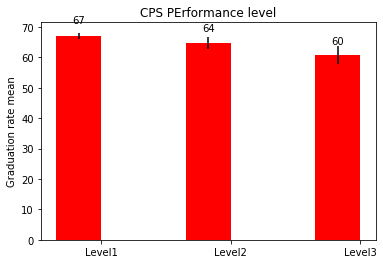

In [13]:
#######Visualizing mean value of grouped by CPS_Performance_Level versus Graduation rate
import numpy as np
import matplotlib.pyplot as plt

N = 3
grouped_means = (67.133813, 64.859167, 60.765775,)
Cps_level = (1, 2, 3)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, grouped_means, width, color='r', yerr=Cps_level)

# add some text for labels, title and axes ticks
ax.set_ylabel('Graduation rate mean')
ax.set_title('CPS PErformance level')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Level1', 'Level2', 'Level3'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.show()

As you can see, there is a direct relation between CPS_Performance_Level and Graduation rate,As every school hase a good level of CPS has good graduation rate at all.

#### let us to analyze and visualize with other features like SAFETY_SCORE  and Environment_Score with Graduation_Rate.

In these two cells I used Safety score and Environment score to visualize their effect on graduation rate or performance of schools. The effect of two features as the figure shows are approximately same. Therefore I use correlation like each other to make function to score.

In [14]:
sch.groupby(['SAFETY_SCORE','Environment_Score'])['Graduation_Rate_%'].mean()
print('The correlation between SAFETY_SCORE and Graduation_Rate_% is: ', \
      sch['Graduation_Rate_%'].corr(sch['SAFETY_SCORE']))

The correlation between SAFETY_SCORE and Graduation_Rate_% is:  0.17738732723569708


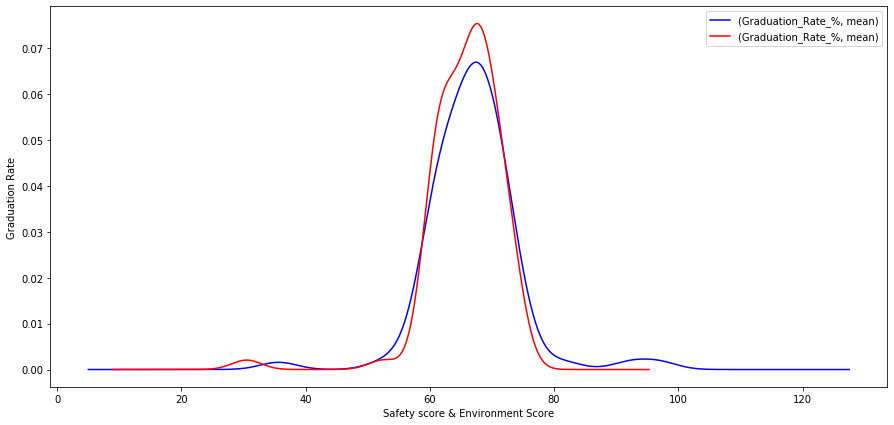

In [15]:
grouped_Safety=sch.groupby('SAFETY_SCORE').agg({'Graduation_Rate_%':['mean']})
grouped_Envro=sch.groupby('Environment_Score').agg({'Graduation_Rate_%':['mean']})
fig, ax = plt.subplots(figsize=(8,6))
grouped_Safety.plot(kind='kde', color='blue',figsize=(15,7), label='SAFETY_SCORE', ax=ax)
grouped_Envro.plot(kind='kde',color='red',figsize=(15,7), label='Environment_Score', ax=ax)
plt.ylabel('Graduation Rate')
plt.xlabel('Safety score & Environment Score')
leg=plt.legend()
plt.show()

As you can see when Safety & Environment Score between 50 to 80 has a high graduation in average so, safety and environment score has a direct impact on graduation rate of schools. Red is Environment score and Blue is Safety Score of Schools. Blue line is for safety score and red belongs to environment score.

#### let us to investigate Teacher score and Leader score on this graduation rate

At these part of cells I use Teacher score and Leader score to visualize their impact on schools performance as their graduation rate. As you will see their effect are almost same. I rearranged teacher score and leader score as four part of ranges to grouped and calculate their effect with graduation rate average and put them to new dataframe to plot it.

In [73]:
grouped_Leaders=sch.groupby('Leaders_Score_').agg({'Graduation_Rate_%':['mean']})
grouped_Teachers=sch.groupby('Teachers_Score').agg({'Graduation_Rate_%':['mean']})
grouped_means=grouped_Leaders
grouped_means1=grouped_Teachers

In [76]:
grouped_Teachers=grouped_Teachers.reset_index()
grouped_means1=grouped_Teachers.groupby(pd.cut(grouped_Teachers['Teachers_Score'], np.arange(0,100, 20))).mean()
grouped_means1=grouped_means1.drop(['index'], axis=1)
grouped_means['Graduation_Rate_%']
grouped_means1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Graduation_Rate_%
,mean
Teachers_Score,
"(0, 20]",67.922222
"(20, 40]",65.548567
"(40, 60]",66.403617
"(60, 80]",66.505093


In [88]:
grouped_merg=pd.concat([grouped_means,grouped_means1], axis=1,join='inner')

Graduation_Rate_%           
                      mean       mean
(0, 20]          62.793750  67.922222
(20, 40]         66.248137  65.548567
(40, 60]         65.982295  66.403617
(60, 80]         65.309743  66.505093

<Figure size 720x360 with 0 Axes>

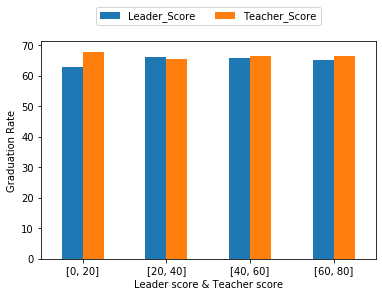

In [109]:
#### In this part I plot bar chart based on leaders and teachers score to show how they influence on performance.
plotdata = pd.DataFrame({
    "Leader_Score":[62.793750, 66.248137, 65.982295,65.309743],
    "Teacher_Score":[67.922222, 65.548567, 66.403617, 66.505093]}, 
    index=["[0, 20]", "[20, 40]", "[40, 60]", "[60, 80]"]
)
plt.figure(figsize=(10,5))
plotdata.plot(kind='bar', rot= 0)
plt.xlabel("Leader score & Teacher score")
plt.ylabel("Graduation Rate")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=False)

from this barplot, this can be extracted that teacher and leader scores have a great impact on graduation rate,
it means both of these Leader and Teacher have same impact on students performance. but teachers are little more than leaders and this is obvious, because teachers have direct communication with their students therfore it makes very important influence on students dicision making and their progress. At next step I want to visualize the schools location on map and I should use map folium and get chicago's latitude and longitude.

#### Get the latitude and longitude of Chicago city to map it and add schools

In [12]:
address = 'Chicago, IL'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


#### Now let's Visualize chicago with schools location

In [13]:
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Schools['Latitude'], Schools['Longitude'], Schools['COMMUNITY_AREA_NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

## Methodology <a name="Methodology"></a>

### 1.score and categorize schools based on function value 

For categories schools from point of schools features, I would like to rank schools to find better schools in term of performance among them.
As you can see above the schools which have high college enrollment are those have somehow minimum Rate of Misconducts and beside that, those schools have about more than 50% safety score and environment score, in this part of project I go through 
rank each school according to their features and values of those to determine their great score or rank among all of available schools information in our dataframe.I categorize schools with adding another column named Category to set a rank based on different features. this features are Environmet_Score, Leaders_Score, Teachers_Score, Safety_Score,CPS_Performance_Level, College_Enrollment and Graduation_Rate%. scores are defined as a function that each of these features have a coef to calculate final score in ranking. 
I would like to define function according to their value of ratio to Graduation rate and college enrollment. based on correlation of each feature with graduation rate and college enrollment I made the function as follow:

F= CPS_Performance_Policy*(-0.28)+ Environment_Score*(0.172)+Leaders_Score*(0.038)+Teachers_Score*(0.044)+
Safety_Score*(0.177)+Graduation_rate*(0.64)+ college_Enrollment*(0.55)

This F make schools rank based on ther value of these features an the weigh of every features have a direct impression on
schools category as top to low.

In [14]:
def get_category(row):
    return (row['CPS_Performance_Policy_Level']*(-0.28)+ row['Environment_Score']*(0.172)+ row['Leaders_Score_']*(0.038)+ \
           row['Teachers_Score']*(0.044)+ row['SAFETY_SCORE']*(0.177)+ row['Graduation_Rate_%']*(0.64) + \
           row['COLLEGE_ENROLLMENT']*(0.55))
sch['Score']=sch.apply(get_category, axis=1)  
sch.head()

,School_ID,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,SAFETY_SCORE,Environment_Score,Leaders_Score_,Teachers_Score,Rate_of_Misconducts_(per_100_students)_,COLLEGE_ENROLLMENT,Graduation_Rate_%,Score
0,610038.0,1.0,1.0,99.0,74.0,65.0,70.0,2.0,813.0,73.0,529.391
1,610281.0,1.0,0.0,54.0,74.0,63.0,76.0,16.0,521.0,73.0,361.014
2,610185.0,2.0,0.0,61.0,50.0,50.0,49.0,2.0,1324.0,81.0,802.933
3,609993.0,1.0,0.0,56.0,45.0,65.0,48.0,10.0,556.0,73.0,374.474
4,610513.0,2.0,1.0,49.0,60.0,45.0,54.0,16.0,302.0,61.0,227.659


In [15]:
def set_category(df):
    if (df['Score']<=300) and (df['Score']>25):
        return 5
    elif (df['Score']<=500) and (df['Score']>300):
        return 4
    elif(df['Score']<=700) and (df['Score']>500):
        return 3
    elif (df['Score']<=1200) and (df['Score']>700):
        return 2
    elif(df['Score']>1200):
        return 1

In [16]:
sch['Cat'] = sch.apply(set_category, axis = 1)

In [17]:
sch.sort_values('Cat', ascending=True).reset_index(drop=True).head(5)

,School_ID,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,SAFETY_SCORE,Environment_Score,Leaders_Score_,Teachers_Score,Rate_of_Misconducts_(per_100_students)_,COLLEGE_ENROLLMENT,Graduation_Rate_%,Score,Cat
0,609729.0,3.0,0.0,48.0,36.0,30.0,31.0,14.0,2366.0,62.1,1357.396,1
1,609755.0,1.0,0.0,95.0,69.0,52.0,46.0,1.0,2166.0,93.9,1283.799,1
2,609720.0,1.0,0.0,88.0,62.0,47.0,49.0,2.0,4368.0,92.2,2491.310,1
3,609738.0,2.0,0.0,65.0,44.0,45.0,45.0,9.0,2342.0,77.9,1360.159,1
4,609756.0,3.0,0.0,43.0,37.0,33.0,39.0,9.0,3320.0,76.1,1890.809,1


In [18]:
sch['Top_schools']=sch['Cat'].apply(lambda x: True if x<=3 else False)###assign True and False according to their rank

In [19]:
###### try to join name of school and other features to map schools######
sch1=Schools[['NAME_OF_SCHOOL','COMMUNITY_AREA_NAME']]
sch=pd.concat([sch,sch1], axis=1, sort=False)
sch.head()

,School_ID,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,SAFETY_SCORE,Environment_Score,Leaders_Score_,Teachers_Score,Rate_of_Misconducts_(per_100_students)_,COLLEGE_ENROLLMENT,Graduation_Rate_%,Score,Cat,Top_schools,NAME_OF_SCHOOL,COMMUNITY_AREA_NAME
0,610038.0,1.0,1.0,99.0,74.0,65.0,70.0,2.0,813.0,73.0,529.391,3,True,Abraham Lincoln Elementary School,LINCOLN PARK
1,610281.0,1.0,0.0,54.0,74.0,63.0,76.0,16.0,521.0,73.0,361.014,4,False,Adam Clayton Powell Paideia Community Academy ...,SOUTH SHORE
2,610185.0,2.0,0.0,61.0,50.0,50.0,49.0,2.0,1324.0,81.0,802.933,2,True,Adlai E Stevenson Elementary School,ASHBURN
3,609993.0,1.0,0.0,56.0,45.0,65.0,48.0,10.0,556.0,73.0,374.474,4,False,Agustin Lara Elementary Academy,NEW CITY
4,610513.0,2.0,1.0,49.0,60.0,45.0,54.0,16.0,302.0,61.0,227.659,5,False,Air Force Academy High School,ARMOUR SQUARE


In [25]:
sch1=Schools[['Latitude','Longitude']]
sch=pd.concat([sch,sch1], axis=1, sort=False)
sch.head(3)

,School_ID,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,SAFETY_SCORE,Environment_Score,Leaders_Score_,Teachers_Score,Rate_of_Misconducts_(per_100_students)_,COLLEGE_ENROLLMENT,Graduation_Rate_%,Score,Cat,Top_schools,NAME_OF_SCHOOL,COMMUNITY_AREA_NAME,Latitude,Longitude
0,610038.0,1.0,1.0,99.0,74.0,65.0,70.0,2.0,813.0,73.0,529.391,3,True,Abraham Lincoln Elementary School,LINCOLN PARK,41.924497,-87.644522
1,610281.0,1.0,0.0,54.0,74.0,63.0,76.0,16.0,521.0,73.0,361.014,4,False,Adam Clayton Powell Paideia Community Academy ...,SOUTH SHORE,41.760324,-87.556736
2,610185.0,2.0,0.0,61.0,50.0,50.0,49.0,2.0,1324.0,81.0,802.933,2,True,Adlai E Stevenson Elementary School,ASHBURN,41.747111,-87.731702


In [21]:
 for name, community_name, cat, top in zip(sch.NAME_OF_SCHOOL, sch.COMMUNITY_AREA_NAME, sch.Cat, sch.Top_schools):
        if cat<=2:
                print('School with name {} at community {} with category {} is in best categoris school.'.format(name,
                                                                                                       community_name,
                                                                                                       cat)) 

School with name Adlai E Stevenson Elementary School at community ASHBURN with category 2 is in best categoris school.
School with name Albert G Lane Technical High School at community NORTH CENTER with category 1 is in best categoris school.
School with name Benito Juarez Community Academy High School at community LOWER WEST SIDE with category 2 is in best categoris school.
School with name Carl Schurz High School at community IRVING PARK with category 1 is in best categoris school.
School with name Charles Allen Prosser Career Academy High School at community BELMONT CRAGIN with category 2 is in best categoris school.
School with name Charles P Steinmetz Academic Centre High School at community BELMONT CRAGIN with category 2 is in best categoris school.
School with name David G Farragut Career Academy High School at community SOUTH LAWNDALE with category 2 is in best categoris school.
School with name Edward Beasley Elementary Magnet Academic Center at community WASHINGTON PARK with 

###### As you see we found 37  best schools among 566 schools in Chicago city as printed above. You can follow the way function scored every 
###### school based on their features value and found top school. Now let's map every school according their latitude and longitude value.

### let's visualize schools based on their category

In [26]:
    # These codes show schools base on their latitude and longitude the high category school would be showm with large radius
    # and gradually getting smaller to the lower category school.

    Chicago_map_cat = folium.Map(location=[latitude, longitude], zoom_start=11)

    k =list(sch.Cat.astype(int).unique())
    x=np.arange(len(k))
    ys = [i + x + (i*x)**2 for i in range(len(k))]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow =[colors.rgb2hex(i) for i in colors_array]

    markers_colors = []
    for lat, lon, poi, cat, name in zip(sch['Latitude'], sch['Longitude'], sch['COMMUNITY_AREA_NAME'], sch['Cat'], sch['NAME_OF_SCHOOL']):
        label = folium.Popup(str(name) +', '+ str(poi) + ' Category ' + str(cat), parse_html=True)
        if int(cat)==1:
            folium.CircleMarker(
            [lat, lon],
            radius=15,
            popup=label,
            color='darkred',
            fill=True,
            fill_color='darkred',
            fill_opacity=0.7).add_to(Chicago_map_cat)
        elif int(cat)==2:
            folium.CircleMarker(
            [lat, lon],
            radius=8,
            popup=label,
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=0.7).add_to(Chicago_map_cat)
        elif int(cat)==3:
            folium.CircleMarker(
            [lat, lon],
            radius=4,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7).add_to(Chicago_map_cat)
        elif int(cat)==4:
            folium.CircleMarker(
            [lat, lon],
            radius=2,
            popup=label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7).add_to(Chicago_map_cat)
        else: 
            folium.CircleMarker(
            [lat, lon],
            radius=2,
            popup=label,
            color=rainbow[cat-1],
            fill=True,
            fill_color=rainbow[cat-1],
            fill_opacity=0.7).add_to(Chicago_map_cat)
    Chicago_map_cat


If you notice carefully to map, the big brown color locations are for category 1 as top schools, the purple circles are for category 2 and second top schools in chicago, blue circles belong to category 3 as third top schools in Chicago city, green spots are for category 4, at last red circles for category 5 as lowest level or ordinary schools among public schools of Chicago. An important issue is the community belong top schools would be a good option for family to buy home because their top rank scool for their children. Communities with good schools is the best option for investment on our children future, like their graduation and college admissions.

### 2. Clustering schools 

In this part I cluster schools based on their features using clustering algorithm, this method try to categorize schools
acoording to their features value. Clustering is one of important algorithm among machine learning which help us to find 
our exploring in same category with same likes features.

In [32]:
####### this cell try to fill Na values with mean value of that column.
Schools['SAFETY_SCORE'].fillna((Schools['SAFETY_SCORE'].mean()), inplace=True)

In [33]:
###### this cell try to group Schools based on their Communitiy name among others.
Schools_grouped = Schools.groupby(['COMMUNITY_AREA_NAME'], sort=False).mean().reset_index()

In [23]:
Schools_grouped.head()

,COMMUNITY_AREA_NAME,School_ID,SAFETY_SCORE,Environment_Score,Rate_of_Misconducts_(per_100_students)_,COLLEGE_ENROLLMENT,Latitude,Longitude,COMMUNITY_AREA_NUMBER
0,LINCOLN PARK,609981.857143,77.224847,52.258755,15.571429,802.142857,41.921793,-87.649618,7.0
1,SOUTH SHORE,610101.222222,39.191310,48.714872,46.000000,504.777778,41.762660,-87.577428,43.0
2,ASHBURN,610019.500000,45.000000,36.125000,24.750000,810.375000,41.745201,-87.715027,70.0
3,NEW CITY,609990.846154,38.615385,42.538462,37.076923,609.384615,41.804480,-87.660268,61.0
4,ARMOUR SQUARE,610229.666667,43.333333,49.000000,5.666667,486.000000,41.840676,-87.633966,34.0


In [34]:
Schools_grouped_clustering =Schools_grouped.drop(['School_ID'],axis=1)#### remove some columns to cluster data properly

In [35]:
Schools_grouped_clustering.head()

,COMMUNITY_AREA_NAME,SAFETY_SCORE,Environment_Score,Rate_of_Misconducts_(per_100_students)_,COLLEGE_ENROLLMENT,Latitude,Longitude,COMMUNITY_AREA_NUMBER
0,LINCOLN PARK,77.224847,52.258755,15.571429,802.142857,41.921793,-87.649618,7.0
1,SOUTH SHORE,39.191310,48.714872,46.000000,504.777778,41.762660,-87.577428,43.0
2,ASHBURN,45.000000,36.125000,24.750000,810.375000,41.745201,-87.715027,70.0
3,NEW CITY,38.615385,42.538462,37.076923,609.384615,41.804480,-87.660268,61.0
4,ARMOUR SQUARE,43.333333,49.000000,5.666667,486.000000,41.840676,-87.633966,34.0


In [36]:
######## normalize and regulate scale of each data of dataset#########
from sklearn.preprocessing import StandardScaler

X = Schools_grouped_clustering.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)

In [37]:
#########applying clustering to dataset#########
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 3 4 3 2 1 0 1 0 3 1 2 1 1 3 1 3 3 1 3 2 3 3 3 2 0 1 3 2 1 1 3 2 2 4 3 1
 1 1 3 2 3 1 3 0 3 4 0 0 2 3 0 2 1 4 3 1 0 4 1 4 4 3 0 1 3 1 2 2 3 1 1 4 0
 4 2 0]


In [38]:
####### add LAbels as column to show clustering categorize of schools.#######
Schools_grouped["Labels"] = labels

#### Now it's time to visualize the clustered communities according to their performance of scools in Chicago city

In [40]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Schools_grouped['Latitude'], Schools_grouped['Longitude'], Schools_grouped['COMMUNITY_AREA_NAME'], Schools_grouped['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
#colormap = branca.colormap.linear.YlOrRd_09.scale(0, 8500)
#colormap = colormap.to_step(index=[0, 1000, 3000, 5000, 8500])
#colormap.caption = 'Clustering of Schools in Chicago (year ending June 2018)'
#colormap.add_to(map_clusters)      
map_clusters

### Conclusion <a name="Conclusion"></a>

If you notice, cluster with label 1(circles with color of purple on map )and respectively, cluster with label 2 (which are ordinary blue colors) are better schools, and label 4 contains good schools (which have been shown with orange color pionts),then cluster 3 with bright sky green color and the last and not vergy good are cluster 0 with red colors in chicago city categorized by clustering algorithm. So if parents have intent to buy home or reach good community to settle, it's better to invest both on money and future of their children to buy their own house at community like ARCHER HEIGHT or other orange color communities. like as last map, I used function to categorize based on their feature, on our analysing and result of function, communities beside airplane symbol contain good schools like clustering results. It means our analyzing and methodology works as better as clustering method. The methodology results would be little better and concise than clustering, but totally, both methods results approximately would be same and rational. These are especially relevant info from clustering technique,analyze and proposed methodology which provide us to smartly make a proper decision. at next future work we can focus on other items like rate of crime along with community or other features like having venues that may have great weigh or impact on proposed function. future works could be categorize communities instead of schools, according to their good schools, venues, shopping centers, crimes and other feature to help people make their own decision smartly and logically.

### hope you like and enjoy this analysing. Good Luck